In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [80]:
Original_data = pd.read_csv("Resources/cscpopendata.csv")
Original_data.head(50)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
7,7,ABSOLUTE Precision Color Powder System - All S...,311.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
8,7,ABSOLUTE Precision Color Powder System - All S...,312.0,D&C RED 28,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1
9,8,ABSOLUTE Precision Color Powder System Opaque ...,313.0,D&C RED 7 CALCIUM LAKE,11,OPI PRODUCTS INC.,ABSOLUTE,59,Nail Products,60,...,13463-67-7,17903,Titanium dioxide,07/13/2009,12/30/2010,NaN,06/09/2010,06/09/2010,NaN,1


In [81]:
#minimizing the data frame
original_df = Original_data[["ProductName", "CSF", "CompanyName", "BrandName", "PrimaryCategory",
                             "CasNumber", "ChemicalId", "ChemicalName", "InitialDateReported", "MostRecentDateReported",
                             "DiscontinuedDate", "ChemicalCreatedAt", "ChemicalUpdatedAt", "ChemicalDateRemoved", "ChemicalCount"]]
original_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [82]:
original_df.shape

(114635, 15)

In [116]:
original_new_df = original_df.drop_duplicates()
original_new_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [117]:
original_new_df.shape

(108477, 15)

In [118]:
print(original_new_df.dtypes)

ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategory                   object
CasNumber                         object
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
dtype: object


In [137]:
original_new_df['InitialDateReported'] = pd.to_datetime(original_new_df['InitialDateReported'])
original_new_df['MostRecentDateReported'] = pd.to_datetime(original_new_df['MostRecentDateReported'])
original_new_df['DiscontinuedDate'] = pd.to_datetime(original_new_df['DiscontinuedDate'])
original_new_df['ChemicalCreatedAt'] = pd.to_datetime(original_new_df['ChemicalCreatedAt'])
original_new_df['ChemicalUpdatedAt'] = pd.to_datetime(original_new_df['ChemicalUpdatedAt'])
original_new_df['ChemicalDateRemoved'] = pd.to_datetime(original_new_df['ChemicalDateRemoved'])
original_new_df.dtypes

ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategory                   object
CasNumber                         object
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
dtype: object

In [138]:
original_new_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [121]:
#couting the chemicals 
original_new_df["ChemicalName"].value_counts()

ChemicalName
Titanium dioxide                                                                                       88890
Silica, crystalline (airborne particles of respirable size)                                             2652
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2092
Butylated hydroxyanisole                                                                                1805
Mica                                                                                                    1789
                                                                                                       ...  
Sodium Bromate                                                                                             1
Cocamide                                                                                                   1
Diethanolamides of the fatty acids of coconut oil                                                          1
Distil

In [122]:
original_new_df["ChemicalCount"].describe()

count    108477.000000
mean          1.284318
std           0.633407
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: ChemicalCount, dtype: float64

In [123]:
len(original_new_df["ProductName"])

108477

## plotting


In [225]:
data_visualiation = original_new_df.groupby(["CompanyName", "BrandName", "ChemicalName"])["ChemicalName"].count().reset_index(name="ChemicalCount")
# data_visualiation.columns = ['CompanyName', 'ChemicalCount']
# data_visualiation['ChemicalName'] = original_new_df["ChemicalName"]
# data_visualiation["BrandName"] = original_new_df["BrandName"]
data_visualiation

,CompanyName,BrandName,ChemicalName,ChemicalCount
0,2355644 Ontario Inc.,Sahajan,Titanium dioxide,1
1,"A. P. Deauville, LLC",Power Stick,Estragole,1
2,ACQUA DI PARMA,ACQUA DI PARMA,Cocamide MEA,5
3,ACQUA DI PARMA,ACQUA DI PARMA,Titanium dioxide,5
4,ACQUA DI PARMA,ACQUA DI PARMA,Triethanolamine,4
...,...,...,...,...
4393,"salerm cosm�tica profesional,Inc.",salerm cosmetics,Cocamide diethanolamine,21
4394,"salerm cosm�tica profesional,Inc.",salerm cosmetics,Phenacetin,16
4395,theBalm,theBalm,"Retinol/retinyl esters, when in daily dosages ...",17
4396,theBalm,theBalm,Talc,10


In [226]:
sorted_df = data_visualiation.sort_values(by='ChemicalCount', ascending=False)
sorted_df.head(20)

,CompanyName,BrandName,ChemicalName,ChemicalCount
614,"Bare Escentuals Beauty, Inc.",bareMinerals,Titanium dioxide,2793
3229,Revlon Consumer Product Corporation,Revlon,Titanium dioxide,2241
3300,S+,SEPHORA,Titanium dioxide,2141
2659,"NYX Los Angeles, Inc.",NYX,Titanium dioxide,2013
2701,Nars Cosmetics,NARS,Titanium dioxide,1974
3688,Tarte Cosmetics,tarte,Titanium dioxide,1841
4112,Victoria's Secret Beauty,Victoria's Secret Beauty,Titanium dioxide,1741
3767,The Procter & Gamble Company,CoverGirl,Titanium dioxide,1588
3719,The Boots Company PLC,No7,Titanium dioxide,1574
3010,Parfums Christian Dior,Parfums Christian Dior,Titanium dioxide,1445


In [230]:
companies_over_1066 = sorted_df[sorted_df['ChemicalCount'] >= 1066]
companies_over_1066

,CompanyName,BrandName,ChemicalName,ChemicalCount
614,"Bare Escentuals Beauty, Inc.",bareMinerals,Titanium dioxide,2793
3229,Revlon Consumer Product Corporation,Revlon,Titanium dioxide,2241
3300,S+,SEPHORA,Titanium dioxide,2141
2659,"NYX Los Angeles, Inc.",NYX,Titanium dioxide,2013
2701,Nars Cosmetics,NARS,Titanium dioxide,1974
3688,Tarte Cosmetics,tarte,Titanium dioxide,1841
4112,Victoria's Secret Beauty,Victoria's Secret Beauty,Titanium dioxide,1741
3767,The Procter & Gamble Company,CoverGirl,Titanium dioxide,1588
3719,The Boots Company PLC,No7,Titanium dioxide,1574
3010,Parfums Christian Dior,Parfums Christian Dior,Titanium dioxide,1445


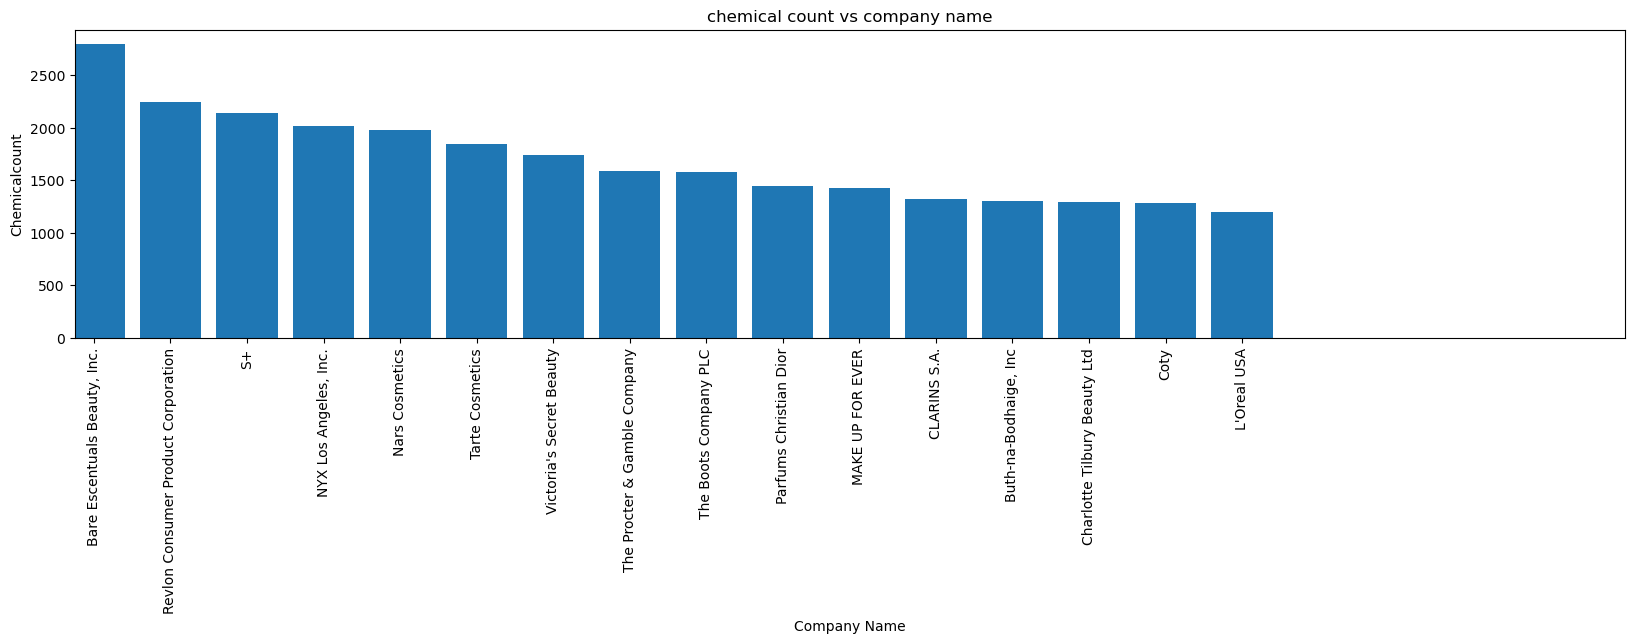

In [231]:
plt.figure(figsize=(20,4))

plt.bar(companies_over_1066["CompanyName"], companies_over_1066["ChemicalCount"])

plt.xlabel('Company Name')
plt.ylabel('Chemicalcount')
plt.title('chemical count vs company name')
plt.xlim(-0.25, len(companies_over_1035))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.show()

In [188]:
print(companies_over_1035["ChemicalName"].isnull().sum())
# companies_over_1035["ChemicalName"] = companies_over_1035["ChemicalName"].astype(str)
# companies_over_1035 = companies_over_1035.dropna(subset=["ChemicalName"])

0


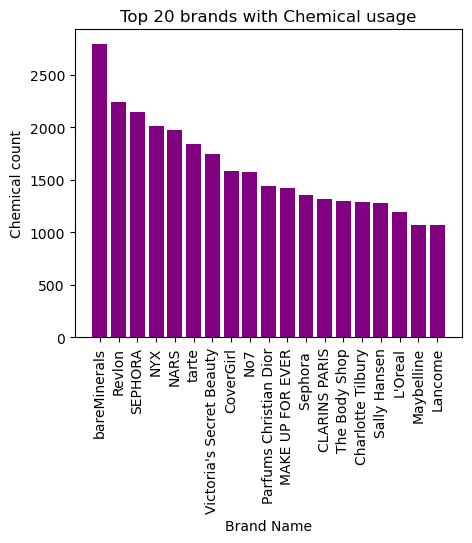

In [235]:
# Bar chart that explains the amount of chemical usages per the 31st companies that were mentioned the most. 
plt.figure(figsize=(5,4))

top_companies = plt.bar(companies_over_1066["BrandName"], companies_over_1066["ChemicalCount"], color="purple")
# top_chemicals, = plt.bar(chemicals_over_71["ChemicalName"], chemicals_over_71["Count"])

plt.xlabel('Brand Name')
plt.ylabel('Chemical count')
plt.title('Top 20 brands with Chemical usage')
# plt.xlim(-0.25, len(top_companies))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.show()

## Plotting without Titanuim Dioxide

In [236]:
data_visualiation_without_titanuim = original_new_df.groupby(["CompanyName", "BrandName", "ChemicalName"])["ChemicalName"].count().reset_index(name="ChemicalCount")
data_visualiation_without_titanuim.head()

,CompanyName,BrandName,ChemicalName,ChemicalCount
0,2355644 Ontario Inc.,Sahajan,Titanium dioxide,1
1,"A. P. Deauville, LLC",Power Stick,Estragole,1
2,ACQUA DI PARMA,ACQUA DI PARMA,Cocamide MEA,5
3,ACQUA DI PARMA,ACQUA DI PARMA,Titanium dioxide,5
4,ACQUA DI PARMA,ACQUA DI PARMA,Triethanolamine,4


In [237]:
rmv_titanuim = data_visualiation_without_titanuim.loc[data_visualiation_without_titanuim["ChemicalName"] != "Titanium dioxide"]
rmv_titanuim.head()

,CompanyName,BrandName,ChemicalName,ChemicalCount
1,"A. P. Deauville, LLC",Power Stick,Estragole,1
2,ACQUA DI PARMA,ACQUA DI PARMA,Cocamide MEA,5
4,ACQUA DI PARMA,ACQUA DI PARMA,Triethanolamine,4
5,ACQUA DI PARMA,Acqua di Parma,Cocamide MEA,1
7,AFFLINK,AffClean�,Cocamide diethanolamine,1


In [213]:
rmv_titanuim = rmv_titanuim.sort_values(by="ChemicalCount", ascending=False)
rmv_titanuim.head(25)

,CompanyName,BrandName,ChemicalName,ChemicalCount
2657,"NYX Los Angeles, Inc.",NYX,Butylated hydroxyanisole,1075
891,Charlotte Tilbury Beauty Ltd,Charlotte Tilbury,"Silica, crystalline (airborne particles of res...",939
3297,S+,SEPHORA,Mica,510
4298,ZOEVA GmbH,ZOEVA,Talc,367
1106,Coty,Sally Hansen,"Retinol/retinyl esters, when in daily dosages ...",350
3299,S+,SEPHORA,Talc,336
4111,Victoria's Secret Beauty,Victoria's Secret Beauty,"Retinol/retinyl esters, when in daily dosages ...",327
617,Bath & Body Works,Bath & Body Works,"Retinol/retinyl esters, when in daily dosages ...",318
1541,GUERLAIN,GUERLAIN,Mica,290
2425,MAKE UP FOR EVER,MAKE UP FOR EVER,Carbon black,239


In [216]:
rmv_titanuim = rmv_titanuim[rmv_titanuim['ChemicalCount'] >= 125 ]
rmv_titanuim

,CompanyName,BrandName,ChemicalName,ChemicalCount
2657,"NYX Los Angeles, Inc.",NYX,Butylated hydroxyanisole,1075
891,Charlotte Tilbury Beauty Ltd,Charlotte Tilbury,"Silica, crystalline (airborne particles of res...",939
3297,S+,SEPHORA,Mica,510
4298,ZOEVA GmbH,ZOEVA,Talc,367
1106,Coty,Sally Hansen,"Retinol/retinyl esters, when in daily dosages ...",350
3299,S+,SEPHORA,Talc,336
4111,Victoria's Secret Beauty,Victoria's Secret Beauty,"Retinol/retinyl esters, when in daily dosages ...",327
617,Bath & Body Works,Bath & Body Works,"Retinol/retinyl esters, when in daily dosages ...",318
1541,GUERLAIN,GUERLAIN,Mica,290
2425,MAKE UP FOR EVER,MAKE UP FOR EVER,Carbon black,239


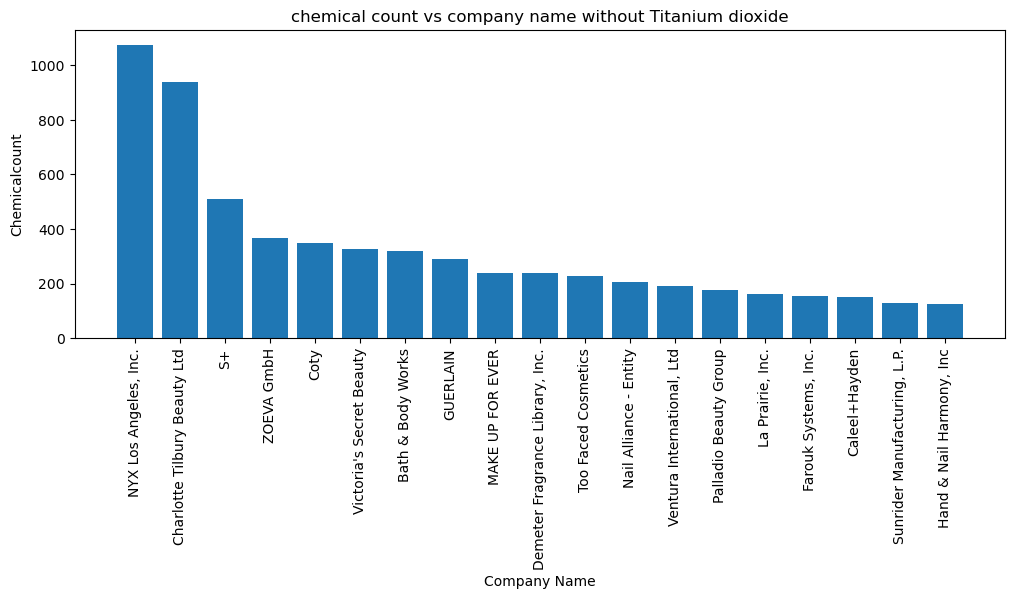

In [222]:
plt.figure(figsize=(12,4))

plt.bar(rmv_titanuim["CompanyName"], rmv_titanuim["ChemicalCount"])

plt.xlabel('Company Name')
plt.ylabel('Chemicalcount')
plt.title('chemical count vs company name without Titanium dioxide')
# plt.xlim(-0.25, len(companies_over_1035))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.show()

## Plotting based on Titanuim Dioxide

In [95]:
#filtering data based on the most used chemical which is Titanium Dioxide.
Titanium = Original_data.loc[Original_data["ChemicalName"]=="Titanium dioxide"]
Titanium.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),48,...,13463-67-7,9,Titanium dioxide,07/09/2009,08/28/2013,11/01/2010,07/09/2009,07/09/2009,NaN,1
6,7,ABSOLUTE Precision Color Powder System - All S...,310.0,5858-81-1,11,OPI PRODUCTS INC.,OPI,59,Nail Products,60,...,13463-67-7,12178,Titanium dioxide,07/13/2009,12/30/2010,NaN,12/04/2009,12/04/2009,NaN,1


In [96]:
Titanium.shape

(93480, 22)

In [241]:
groupby_data = Titanium.groupby("CompanyName")["ChemicalName"].count().reset_index()
groupby_data

,CompanyName,ChemicalName
0,2355644 Ontario Inc.,1
1,ACQUA DI PARMA,9
2,AFFLINK,1
3,"ALBION COSMETICS (America), Inc.",4
4,ALPHAEON Corporation,4
...,...,...
451,"eos Products, LLC",12
452,label.m USA INC,4
453,laboratoire Sintyl SA,12
454,purminerals,192


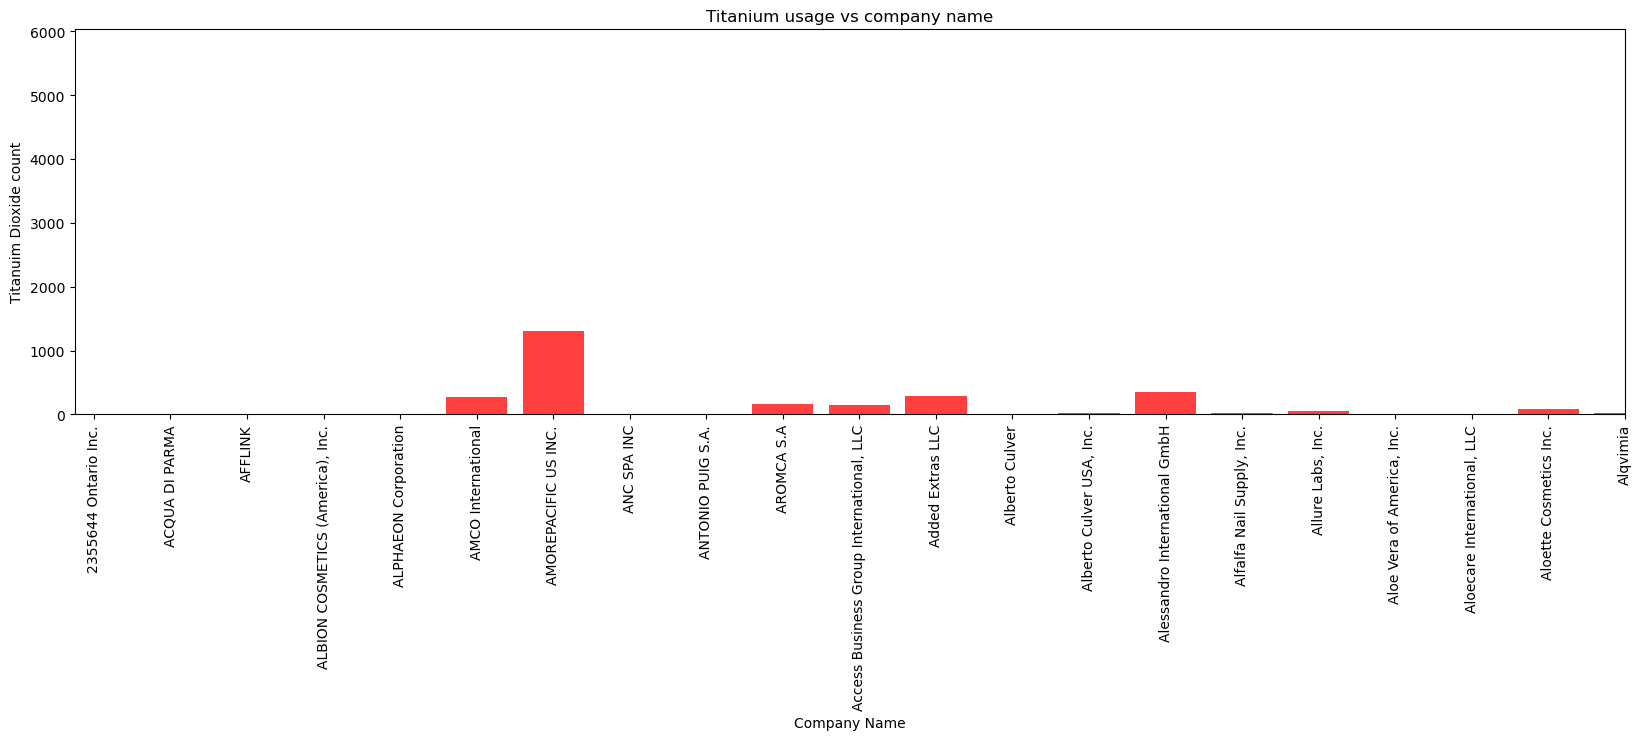

In [242]:
plt.figure(figsize=(20,5))

plt.bar(groupby_data["CompanyName"],groupby_data["ChemicalName"], color="red", alpha=0.75)


plt.xlabel('Company Name')
plt.ylabel('Titanuim Dioxide count')
plt.title('Titanium usage vs company name')
plt.xlim(-0.25, len(top_companies))
# plt.ylim(0, max(rain_df["Inches"])+10)
plt.xticks(rotation=90)
plt.show()

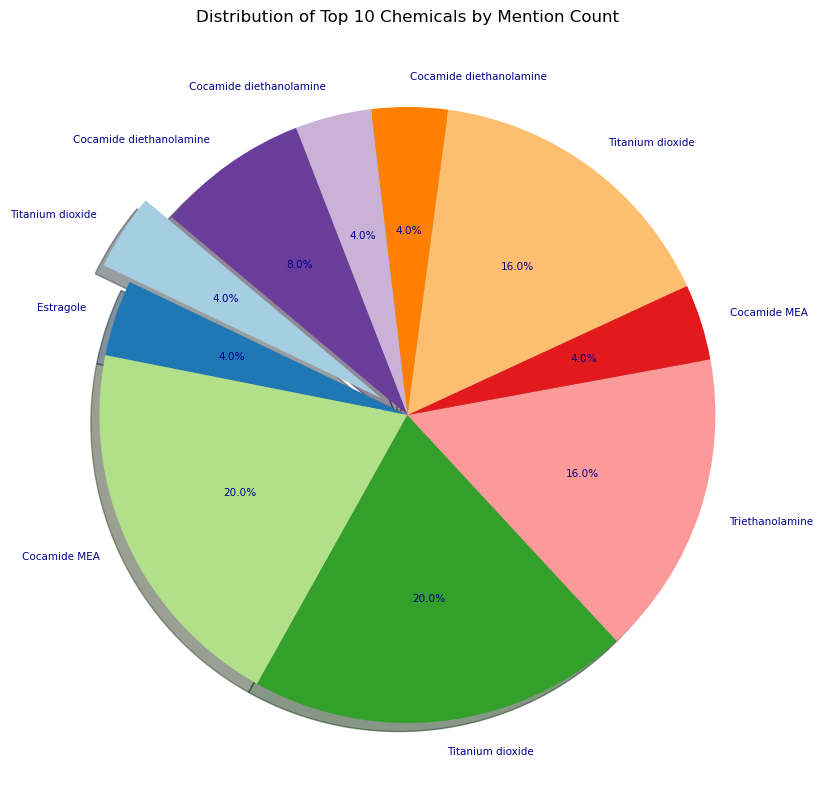

In [243]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
chemical_names = data_visualiation["ChemicalName"]
chemical_counts = data_visualiation["ChemicalCount"]
top_chemicals = chemical_names[:10]  # Top 10 chemicals
top_chemical_counts = chemical_counts[:10]  # Counts for top 10

plt.figure(figsize=(12, 10))
plt.pie(top_chemical_counts, labels=top_chemicals, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=explode, shadow=True, textprops={'fontsize': 7.5, 'color': 'darkblue'})
plt.title('Distribution of Top 10 Chemicals by Mention Count')
plt.size = "equal"
plt.show()

## Chemicals in baby products

In [245]:
original_new_df.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1
1,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,2
2,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,Hair Care Products (non-coloring),140-67-0,5,Estragole,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,2
3,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,1
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,Makeup Products (non-permanent),13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,1


In [246]:
baby_products = original_new_df.loc[original_new_df["PrimaryCategory"]=="Baby Products"]
baby_products.head()

,ProductName,CSF,CompanyName,BrandName,PrimaryCategory,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
6604,BubbleGum Bubbles No Tears Shampoo,NaN,"Farouk Systems, Inc.",BioSilk,Baby Products,0,0,Trade Secret,2009-09-30,2009-09-30,NaT,2009-09-30,2009-10-13,2009-10-13,0
12980,Jasmine Tea Shower Gel,NaN,"Buth-na-Bodhaige, Inc",The Body Shop,Baby Products,68603-42-9,5136,Cocamide diethanolamine,2009-10-09,2011-02-11,2011-02-11,2009-10-09,2009-10-09,NaT,1
12981,Nectarine & Plum Bath & Shower Gel,NaN,"Buth-na-Bodhaige, Inc",The Body Shop,Baby Products,68603-42-9,5139,Cocamide diethanolamine,2009-10-09,2011-02-11,2011-02-11,2009-10-09,2009-10-09,NaT,1
14178,Baby Don't Cry Shampoo,Fragrance/parfum,John Paul Mitchell Systems,John Paul Mitchell Systems,Baby Products,100-42-5,5734,Styrene,2009-10-09,2010-12-30,NaT,2009-10-09,2009-10-09,NaT,1
15001,Nature's Gate Organics Baby Soothing Diaper Ra...,NaN,LEVLAD LLC,Nature's Gate,Baby Products,79-81-2,6155,"Retinol/retinyl esters, when in daily dosages ...",2009-10-12,2019-06-27,2009-05-31,2009-10-12,2009-10-12,NaT,1


In [247]:
baby_products_df = baby_products[["CompanyName", "PrimaryCategory", "ChemicalName","DiscontinuedDate", "ChemicalDateRemoved", "ChemicalCount"]]
baby_products_df.head()

,CompanyName,PrimaryCategory,ChemicalName,DiscontinuedDate,ChemicalDateRemoved,ChemicalCount
6604,"Farouk Systems, Inc.",Baby Products,Trade Secret,NaT,2009-10-13,0
12980,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
12981,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
14178,John Paul Mitchell Systems,Baby Products,Styrene,NaT,NaT,1
15001,LEVLAD LLC,Baby Products,"Retinol/retinyl esters, when in daily dosages ...",2009-05-31,NaT,1


In [106]:
baby_products_df.shape

(49, 6)

In [248]:
baby_products_df['ChemicalName'] = baby_products_df['ChemicalName'].replace({
    "Cadmium and cadmium compounds" : "Cadmium", 
    "Silica, crystalline (airborne particles of respirable size)" : "Silica", 
    "Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents." : "Daily dosages of Retinol/retinyl esters"})
baby_products_df.head(10)

,CompanyName,PrimaryCategory,ChemicalName,DiscontinuedDate,ChemicalDateRemoved,ChemicalCount
6604,"Farouk Systems, Inc.",Baby Products,Trade Secret,NaT,2009-10-13,0
12980,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
12981,"Buth-na-Bodhaige, Inc",Baby Products,Cocamide diethanolamine,2011-02-11,NaT,1
14178,John Paul Mitchell Systems,Baby Products,Styrene,NaT,NaT,1
15001,LEVLAD LLC,Baby Products,Daily dosages of Retinol/retinyl esters,2009-05-31,NaT,1
19139,Harmon Stores Inc.,Baby Products,Cadmium,NaT,NaT,2
19140,Harmon Stores Inc.,Baby Products,Lead,NaT,NaT,2
20078,"Chattem, Inc.",Baby Products,Daily dosages of Retinol/retinyl esters,NaT,NaT,1
20083,"Chattem, Inc.",Baby Products,Daily dosages of Retinol/retinyl esters,NaT,NaT,1
20217,Expanscience Laboratoires,Baby Products,Titanium dioxide,2017-03-15,NaT,1


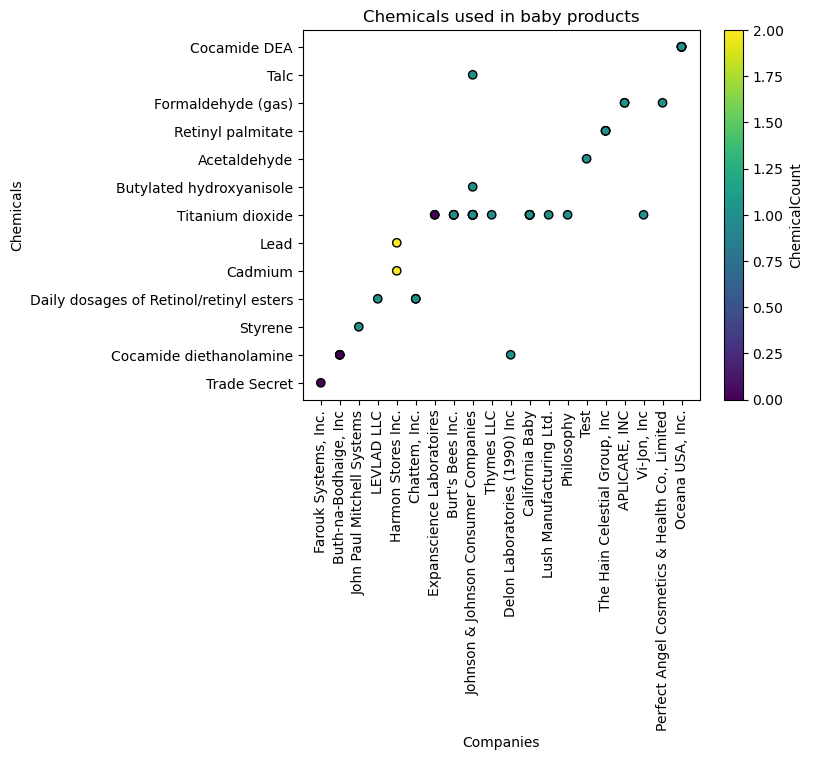

In [249]:
plt.scatter(baby_products_df["CompanyName"], baby_products_df["ChemicalName"], c=baby_products_df["ChemicalCount"], facecolors="red", edgecolors="black")

plt.xticks(rotation=90)
plt.xlabel("Companies")
plt.ylabel("Chemicals")
plt.title("Chemicals used in baby products")
clb = plt.colorbar()
clb.set_label("ChemicalCount")
plt.show()


In [250]:
number_of_baby_products = len(baby_products_df)
number_of_baby_products

47